In [27]:
import numpy as np
import pandas as pd
import mygene
import omnipath as op
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import mellon as ml
from pyensembl import EnsemblRelease

In [28]:
# import gtex expression data

gtex_link = 'https://storage.googleapis.com/gtex_analysis_v7/rna_seq_data/GTEx_Analysis_2016-01-15_v7_RNASeQCv1.1.8_gene_median_tpm.gct.gz'
exp = pd.read_csv(gtex_link, sep='\t', index_col='gene_id', skiprows=2)
exp_cns = exp.loc[:, ['Brain - Anterior cingulate cortex (BA24)',
       'Brain - Caudate (basal ganglia)', 'Brain - Cerebellar Hemisphere',
       'Brain - Cerebellum', 'Brain - Cortex', 'Brain - Frontal Cortex (BA9)',
       'Brain - Hippocampus', 'Brain - Hypothalamus',
       'Brain - Nucleus accumbens (basal ganglia)',
       'Brain - Putamen (basal ganglia)', 'Brain - Spinal cord (cervical c-1)',
       'Brain - Substantia nigra']]
exp_cns = exp_cns.loc[(exp_cns > 0).any(axis=1)]

# import omnipath db
db = op.interactions.import_intercell_network(transmitter_params = {"categories":"ligand"}, receiver_params = {"categories": "receptor"})
db = db[np.logical_not(db['genesymbol_intercell_source'].str.startswith('HLA'))]
db = db[np.logical_not(db['genesymbol_intercell_target'].str.startswith('HLA'))]
db = db[~db['genesymbol_intercell_target'].astype(str).str.startswith('COMPLEX')]
db = db[~db['genesymbol_intercell_source'].astype(str).str.startswith('COMPLEX')]

# convert gtex gene names from ENSEMBL to gene symbols
mg = mygene.MyGeneInfo()
ensembl_gtex = list(np.unique(pd.DataFrame(list(exp_cns.index.str.split('.')))[0]))
#symbols_gtex = mg.querymany(ensembl_gtex, scopes='ensembl.gene', fields='symbol', species='human')
#symbols_gtex = pd.DataFrame(symbols_gtex)['symbol']
#symbols_gtex

In [29]:
# specify the release number
ensembl = EnsemblRelease(109)
genes = ensembl.genes()


In [30]:

# create a DataFrame of gene information
ensembl_ann = pd.DataFrame({
    'gene_id': [gene.gene_id for gene in genes],
    'gene_name': [gene.gene_name for gene in genes],
    'chromosome': [gene.contig for gene in genes],
    'type': [gene.biotype for gene in genes]
})
gtex_annotated = ensembl_ann[ensembl_ann['gene_id'].isin(ensembl_gtex)]
protein = gtex_annotated[gtex_annotated['type']=='protein_coding']


c:\Users\melis\Documents\GitHub\LR_project\mellon\lr\find_hits.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target['Empty'] = 0


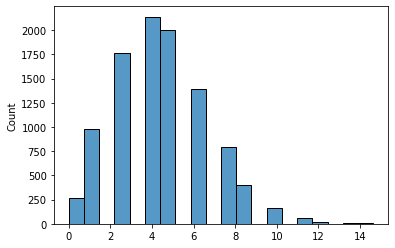

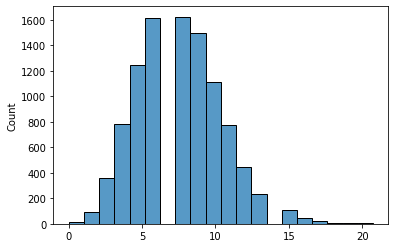

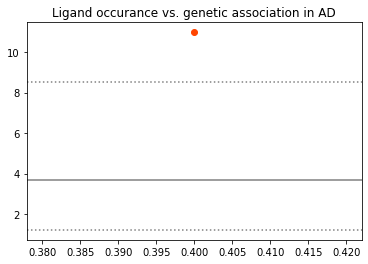

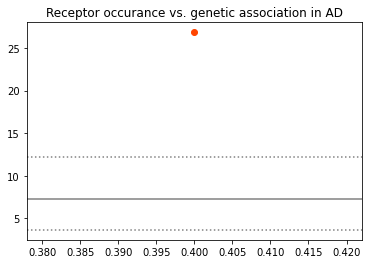

c:\Users\melis\Documents\GitHub\LR_project\mellon\lr\find_hits.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target['Empty'] = 0


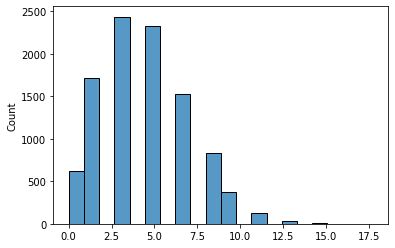

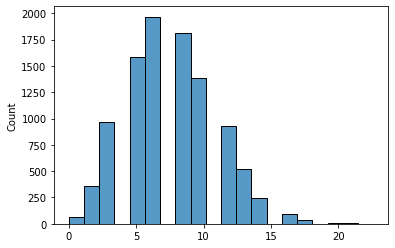

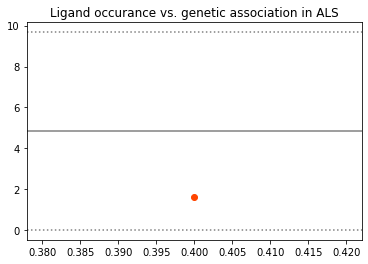

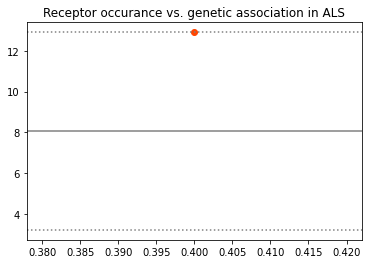

c:\Users\melis\Documents\GitHub\LR_project\mellon\lr\find_hits.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target['Empty'] = 0


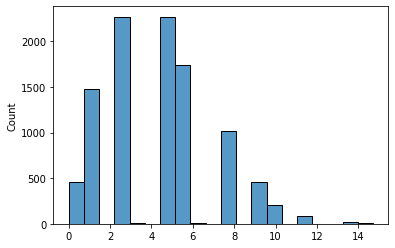

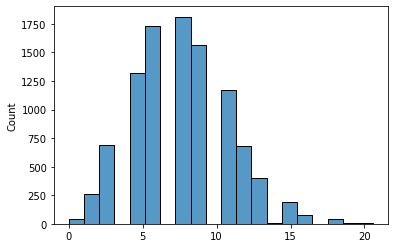

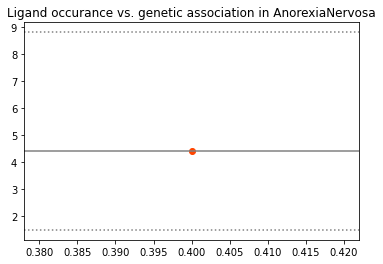

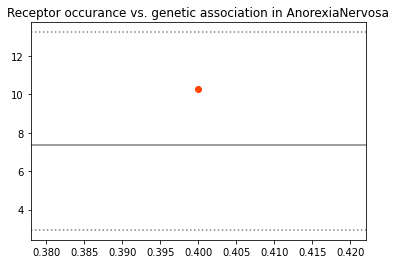

c:\Users\melis\Documents\GitHub\LR_project\mellon\lr\find_hits.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target['Empty'] = 0


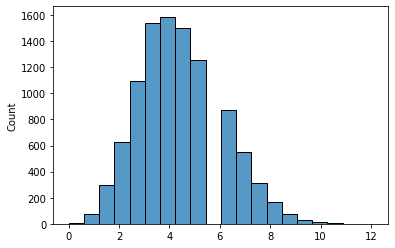

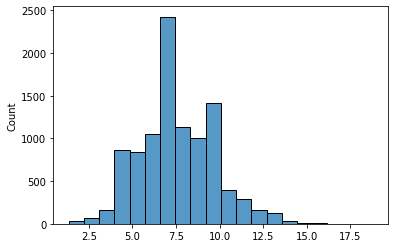

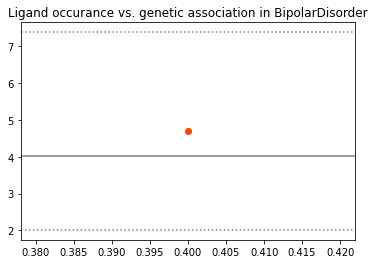

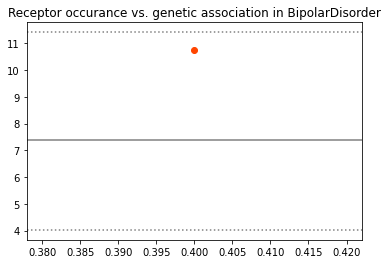

c:\Users\melis\Documents\GitHub\LR_project\mellon\lr\find_hits.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target['Empty'] = 0


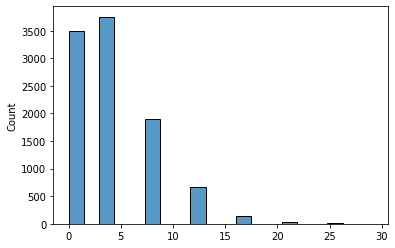

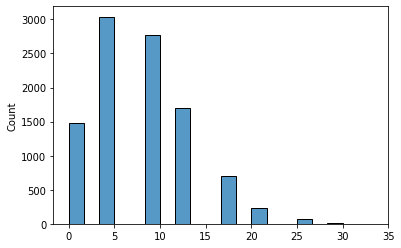

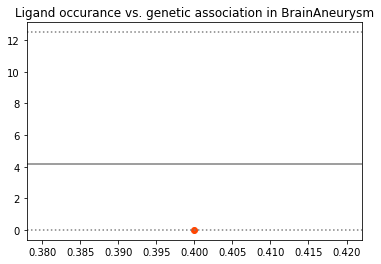

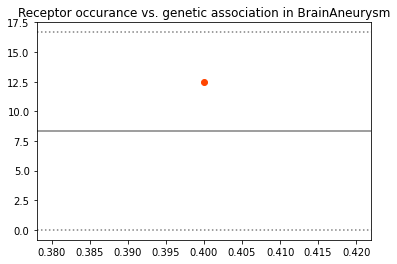

c:\Users\melis\Documents\GitHub\LR_project\mellon\lr\find_hits.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target['Empty'] = 0


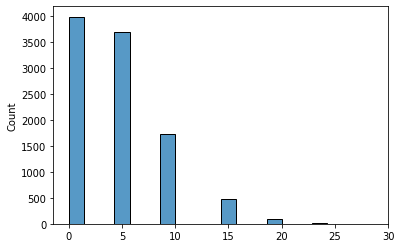

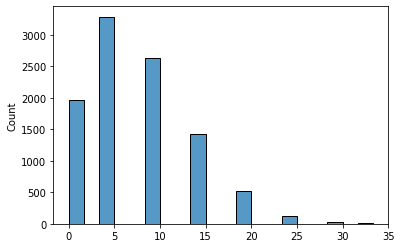

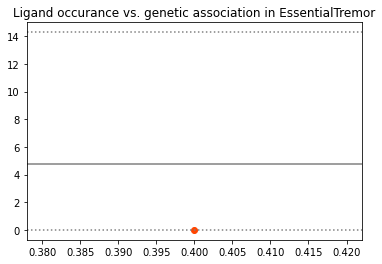

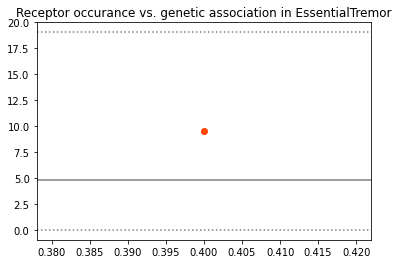

c:\Users\melis\Documents\GitHub\LR_project\mellon\lr\find_hits.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target['Empty'] = 0


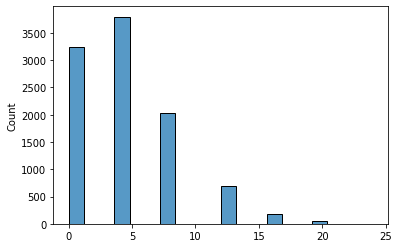

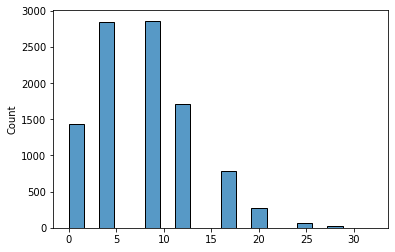

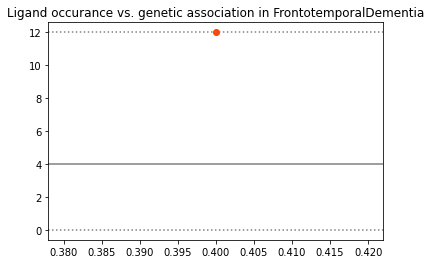

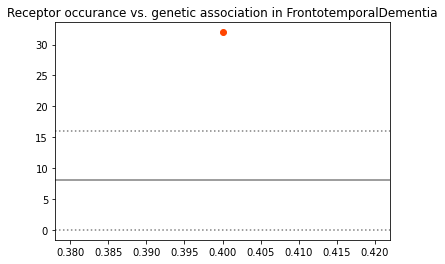

c:\Users\melis\Documents\GitHub\LR_project\mellon\lr\find_hits.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target['Empty'] = 0


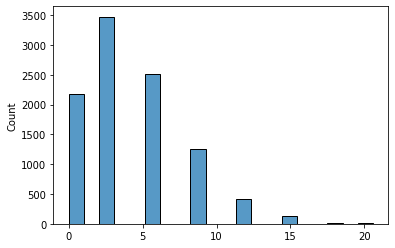

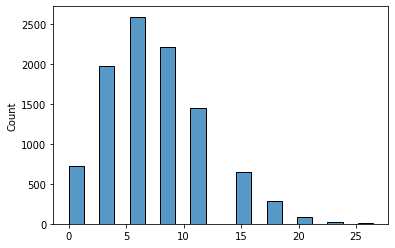

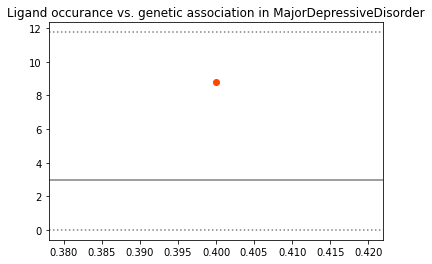

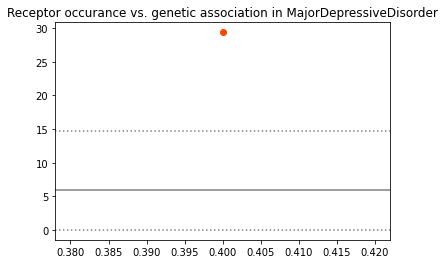

c:\Users\melis\Documents\GitHub\LR_project\mellon\lr\find_hits.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target['Empty'] = 0


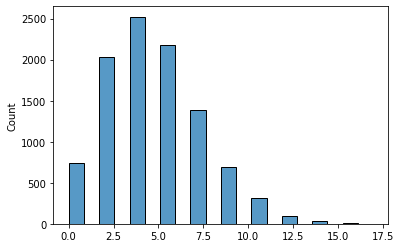

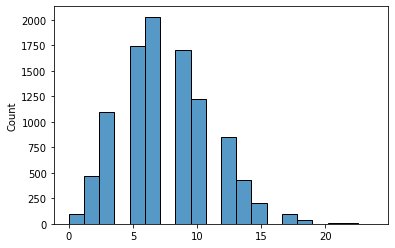

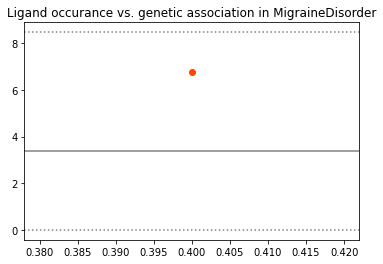

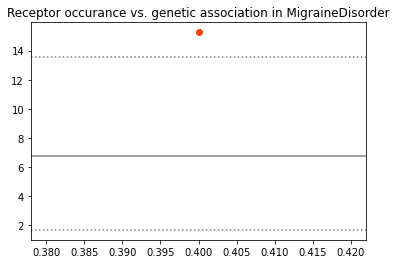

c:\Users\melis\Documents\GitHub\LR_project\mellon\lr\find_hits.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target['Empty'] = 0


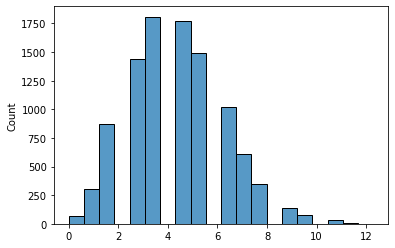

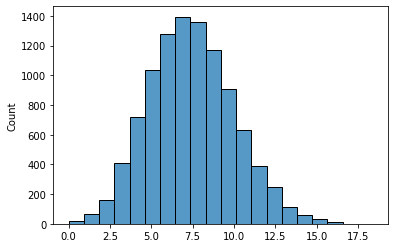

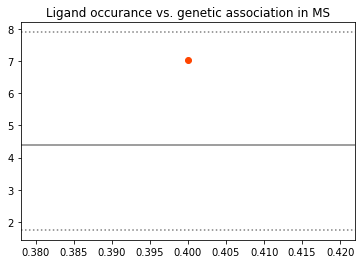

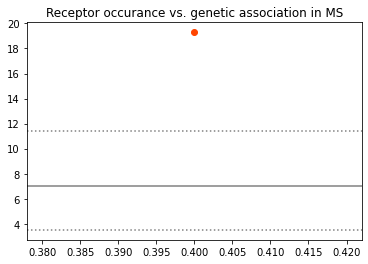

c:\Users\melis\Documents\GitHub\LR_project\mellon\lr\find_hits.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target['Empty'] = 0


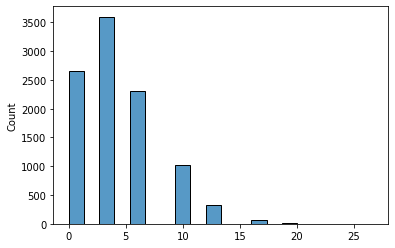

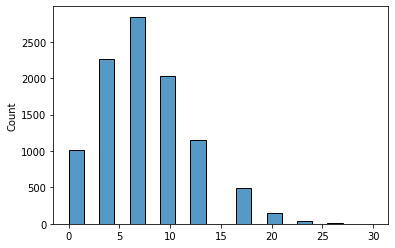

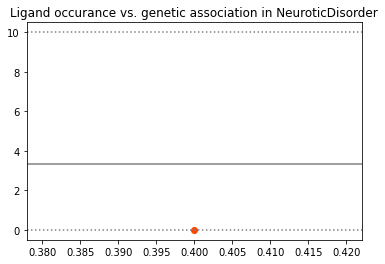

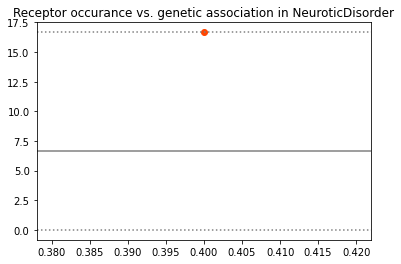

c:\Users\melis\Documents\GitHub\LR_project\mellon\lr\find_hits.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target['Empty'] = 0


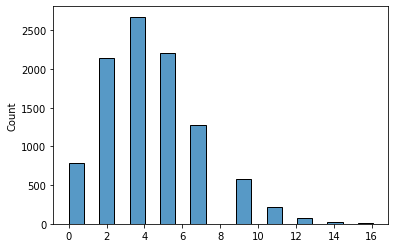

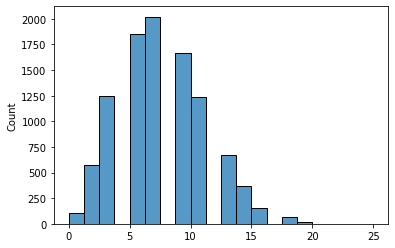

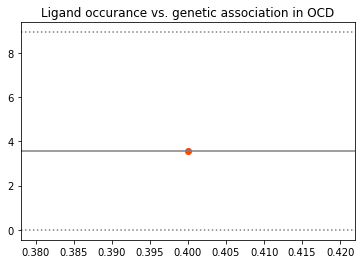

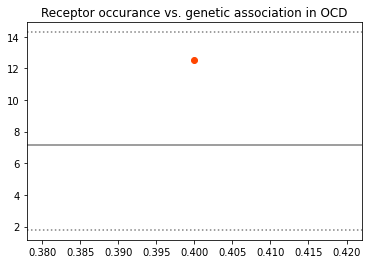

c:\Users\melis\Documents\GitHub\LR_project\mellon\lr\find_hits.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target['Empty'] = 0


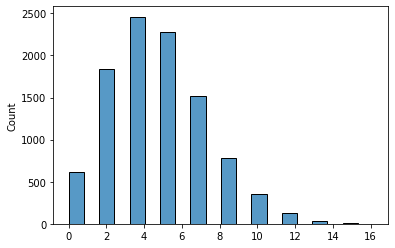

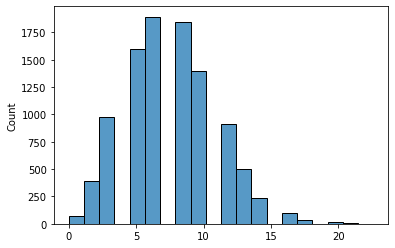

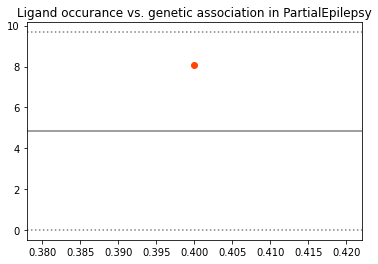

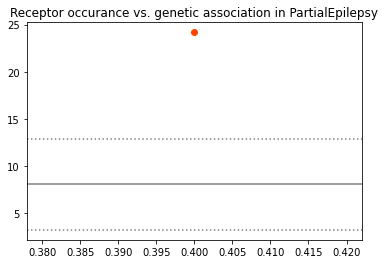

c:\Users\melis\Documents\GitHub\LR_project\mellon\lr\find_hits.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target['Empty'] = 0


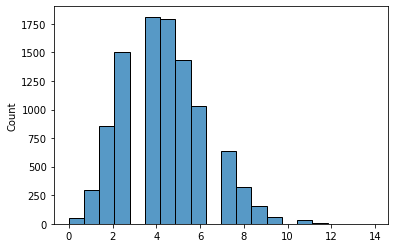

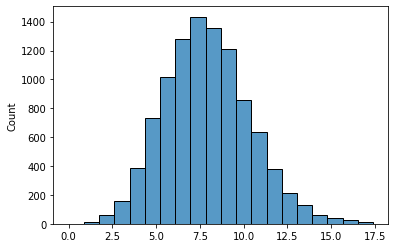

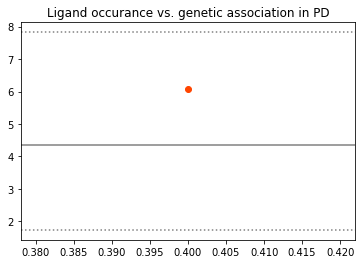

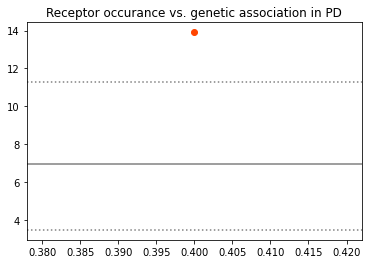

c:\Users\melis\Documents\GitHub\LR_project\mellon\lr\find_hits.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target['Empty'] = 0


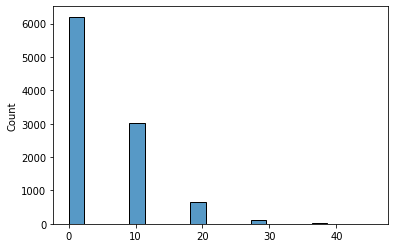

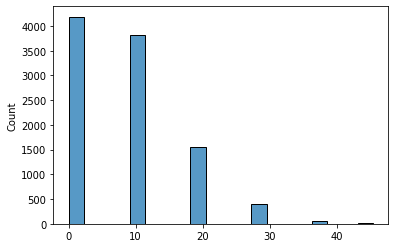

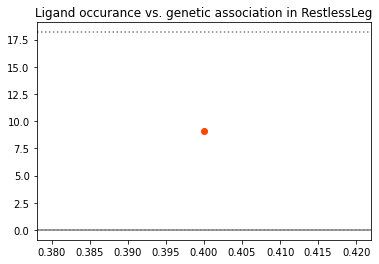

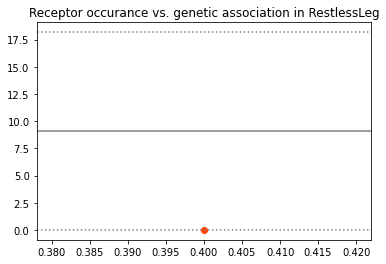

c:\Users\melis\Documents\GitHub\LR_project\mellon\lr\find_hits.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target['Empty'] = 0


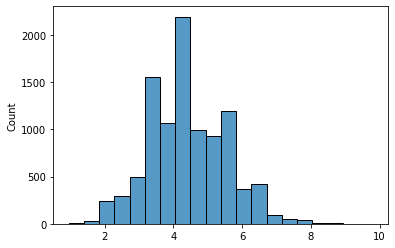

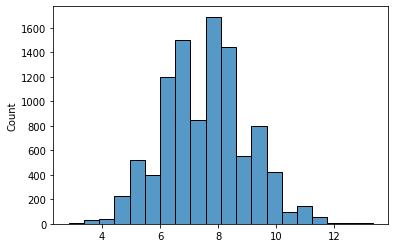

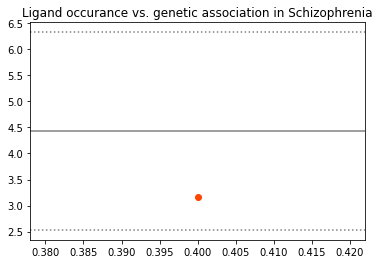

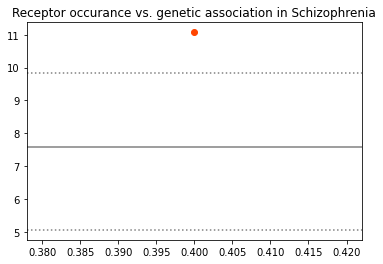

c:\Users\melis\Documents\GitHub\LR_project\mellon\lr\find_hits.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target['Empty'] = 0


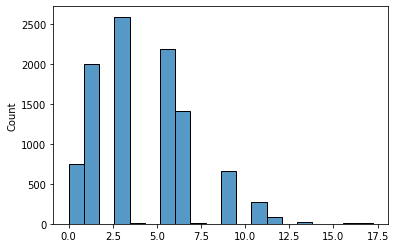

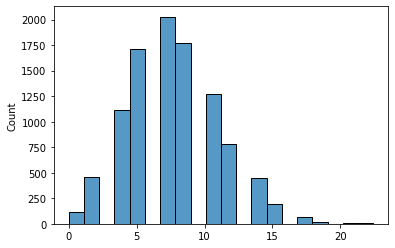

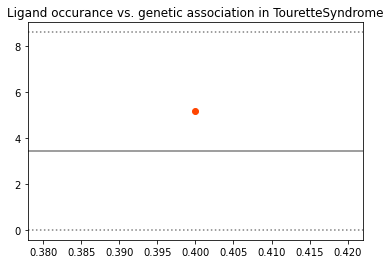

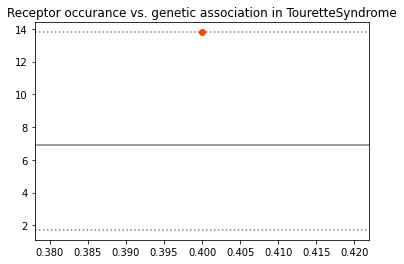

c:\Users\melis\Documents\GitHub\LR_project\mellon\lr\find_hits.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target['Empty'] = 0


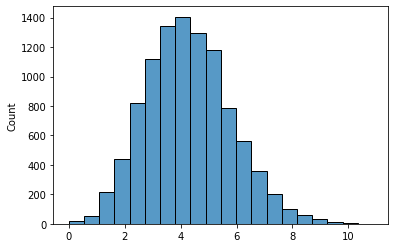

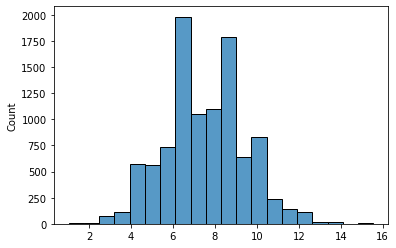

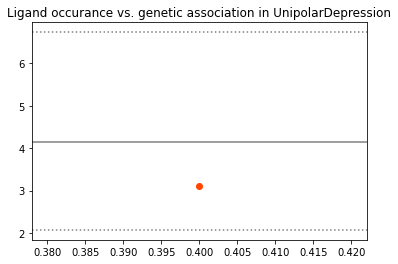

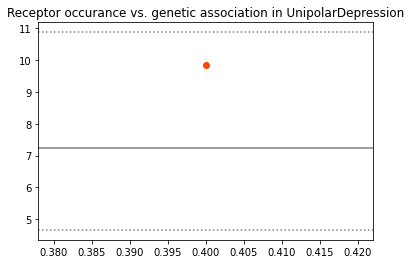

c:\Users\melis\Documents\GitHub\LR_project\mellon\lr\find_hits.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target['Empty'] = 0


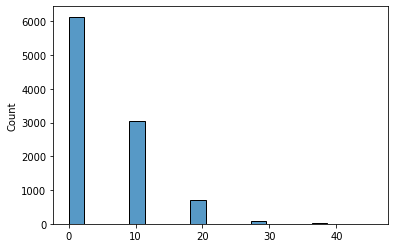

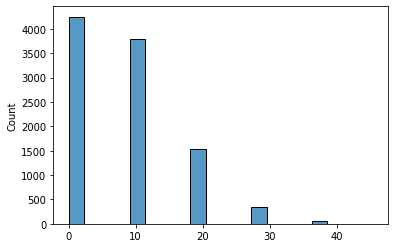

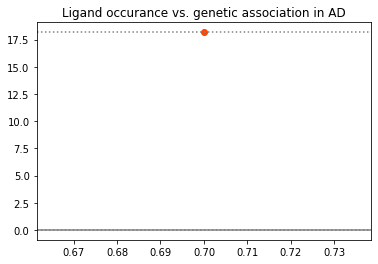

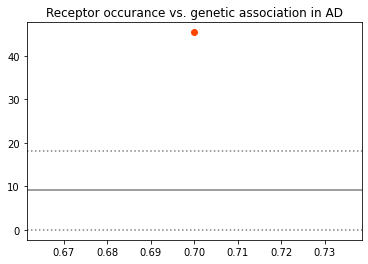

c:\Users\melis\Documents\GitHub\LR_project\mellon\lr\find_hits.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target['Empty'] = 0


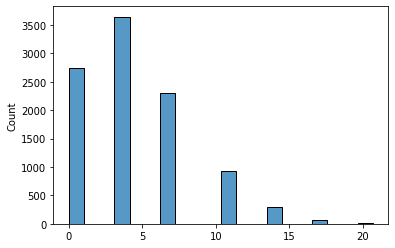

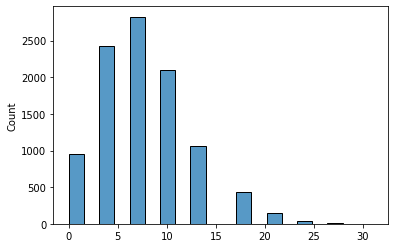

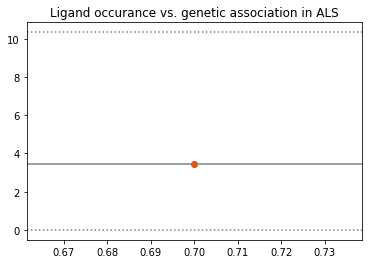

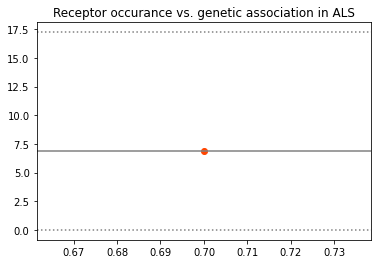

c:\Users\melis\Documents\GitHub\LR_project\mellon\lr\find_hits.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target['Empty'] = 0


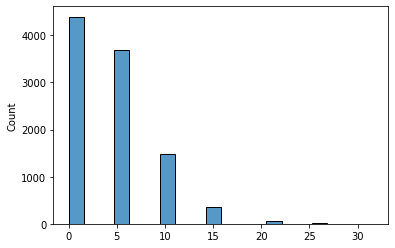

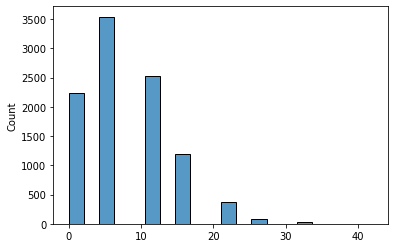

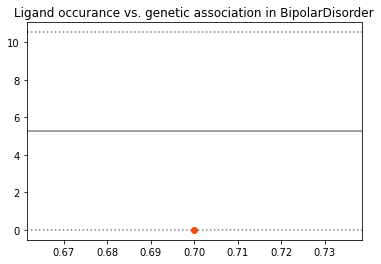

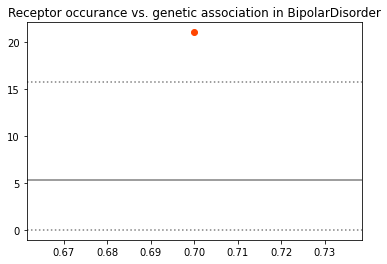

c:\Users\melis\Documents\GitHub\LR_project\mellon\lr\find_hits.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target['Empty'] = 0


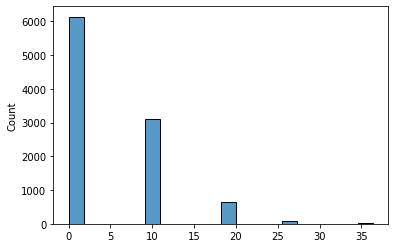

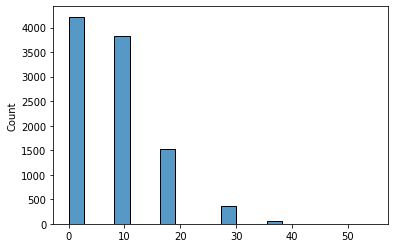

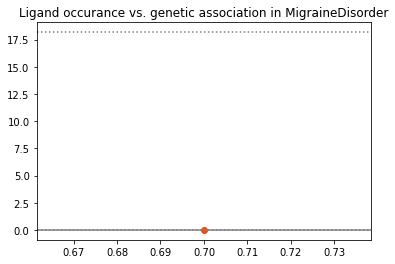

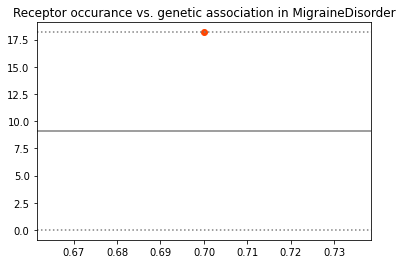

c:\Users\melis\Documents\GitHub\LR_project\mellon\lr\find_hits.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target['Empty'] = 0


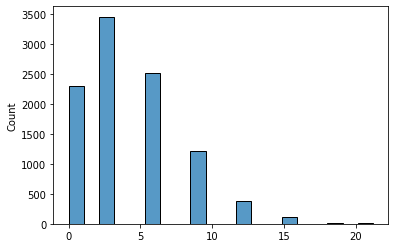

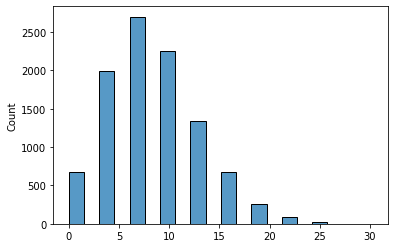

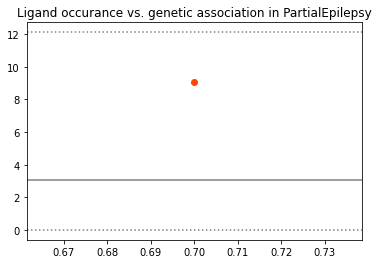

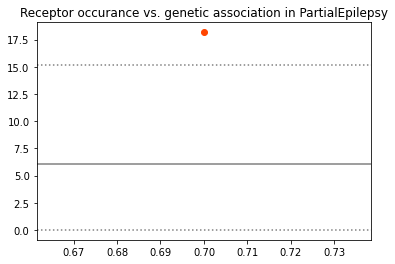

c:\Users\melis\Documents\GitHub\LR_project\mellon\lr\find_hits.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target['Empty'] = 0


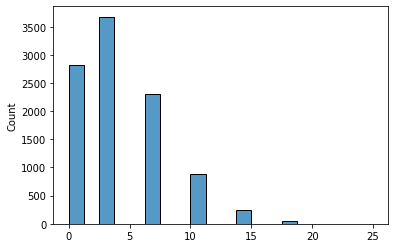

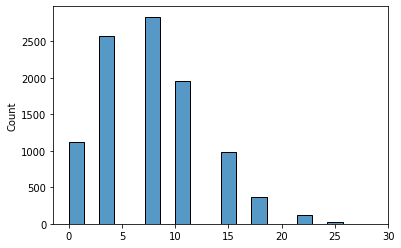

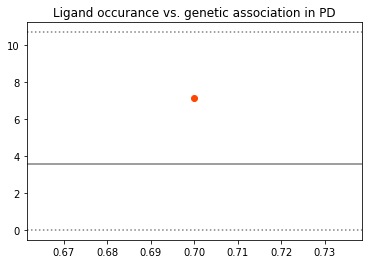

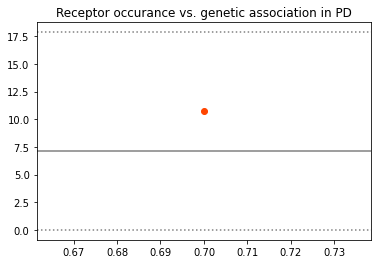

c:\Users\melis\Documents\GitHub\LR_project\mellon\lr\find_hits.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target['Empty'] = 0


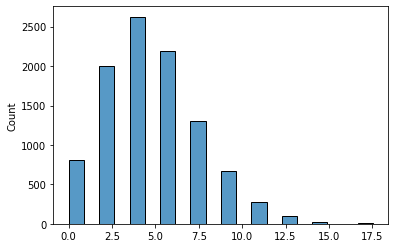

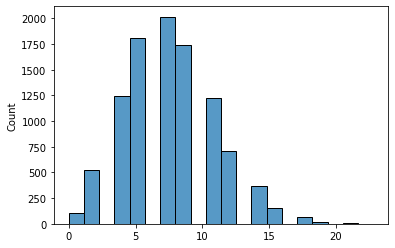

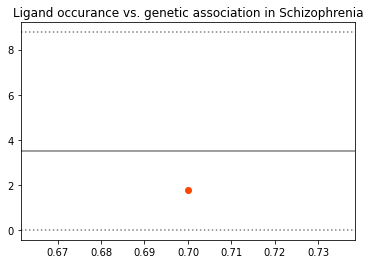

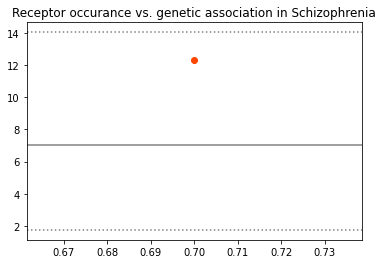

c:\Users\melis\Documents\GitHub\LR_project\mellon\lr\find_hits.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target['Empty'] = 0


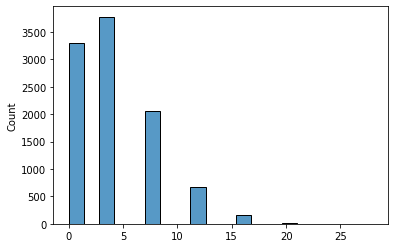

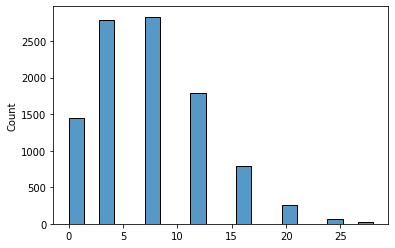

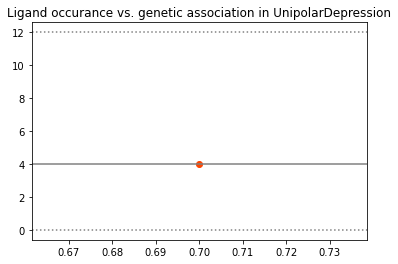

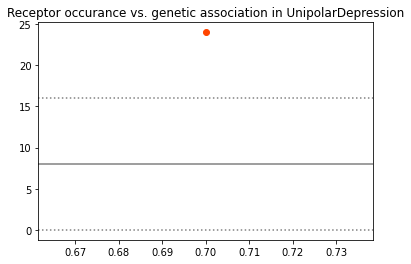

c:\Users\melis\Documents\GitHub\LR_project\mellon\lr\find_hits.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target['Empty'] = 0


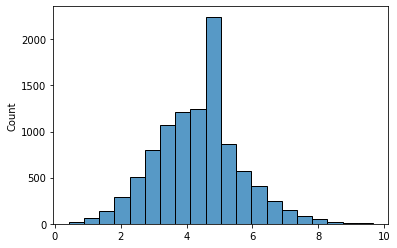

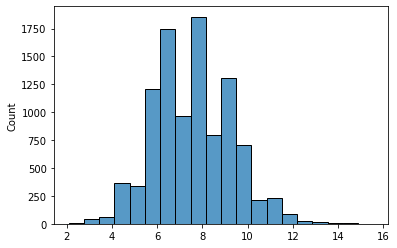

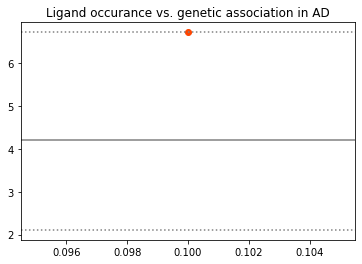

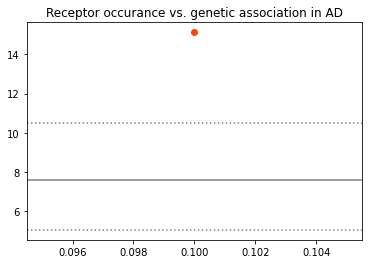

c:\Users\melis\Documents\GitHub\LR_project\mellon\lr\find_hits.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target['Empty'] = 0


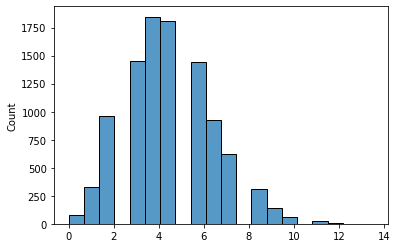

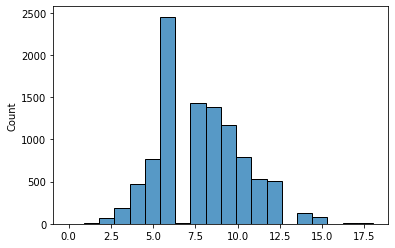

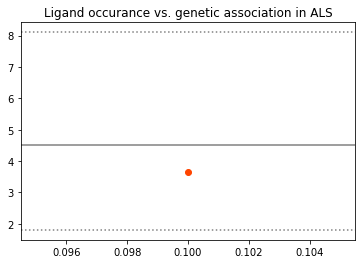

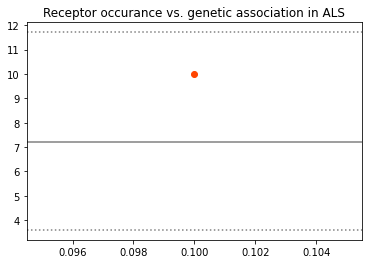

c:\Users\melis\Documents\GitHub\LR_project\mellon\lr\find_hits.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target['Empty'] = 0


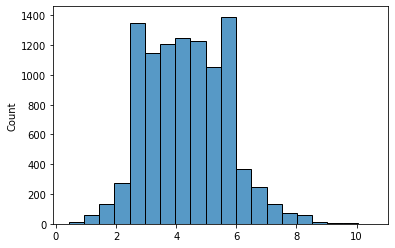

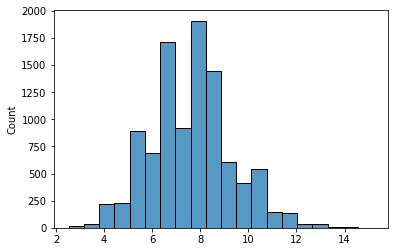

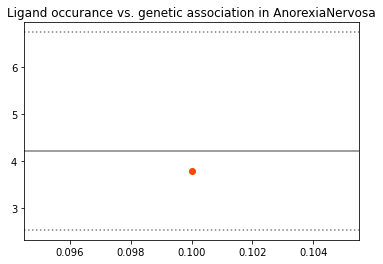

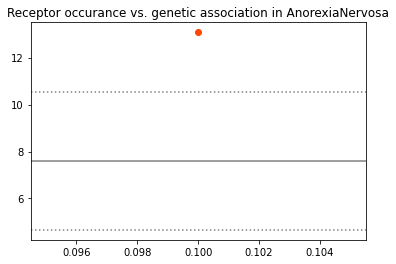

c:\Users\melis\Documents\GitHub\LR_project\mellon\lr\find_hits.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target['Empty'] = 0


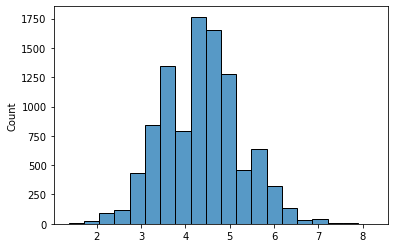

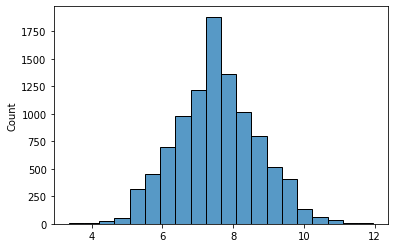

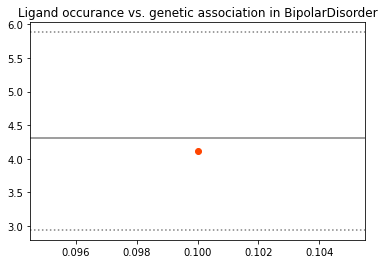

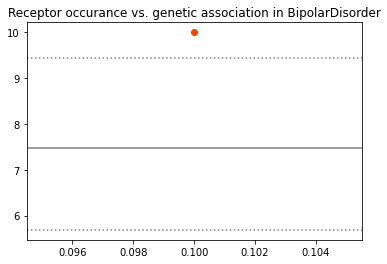

c:\Users\melis\Documents\GitHub\LR_project\mellon\lr\find_hits.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target['Empty'] = 0


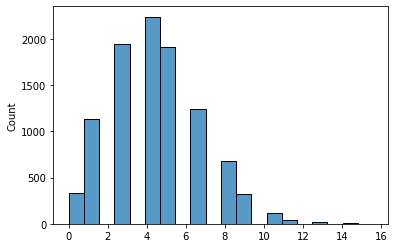

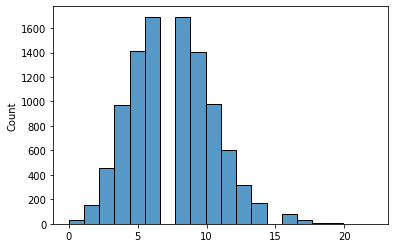

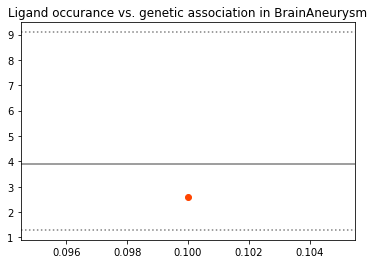

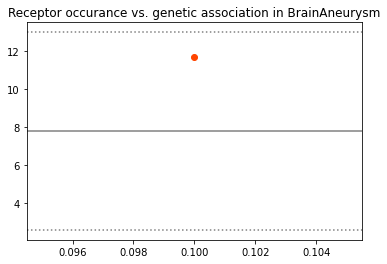

c:\Users\melis\Documents\GitHub\LR_project\mellon\lr\find_hits.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target['Empty'] = 0


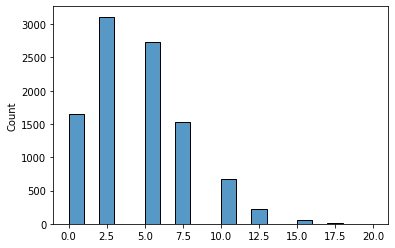

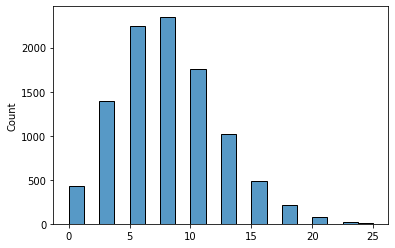

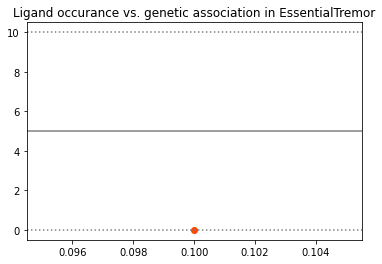

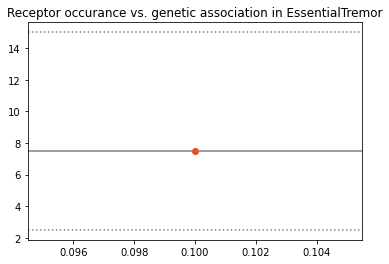

c:\Users\melis\Documents\GitHub\LR_project\mellon\lr\find_hits.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target['Empty'] = 0


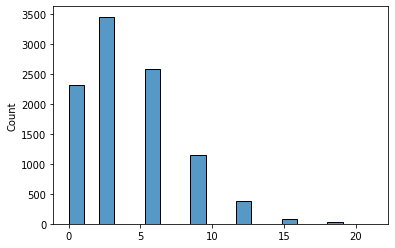

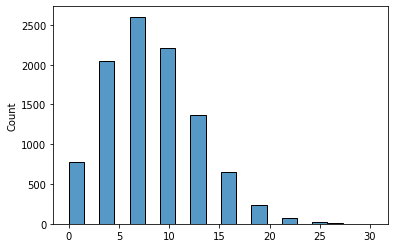

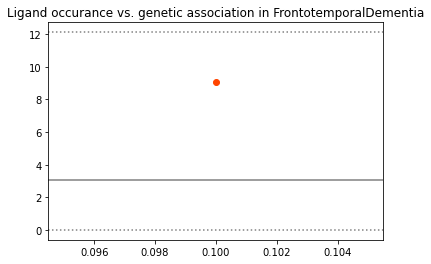

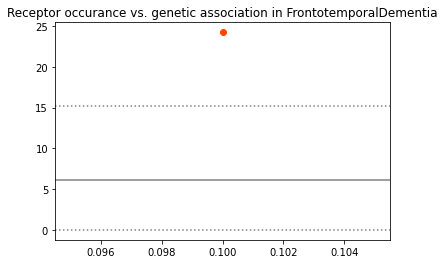

c:\Users\melis\Documents\GitHub\LR_project\mellon\lr\find_hits.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target['Empty'] = 0


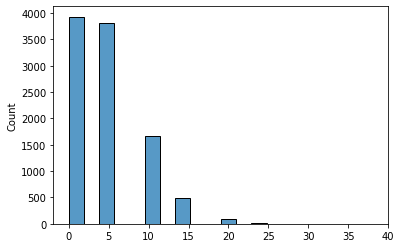

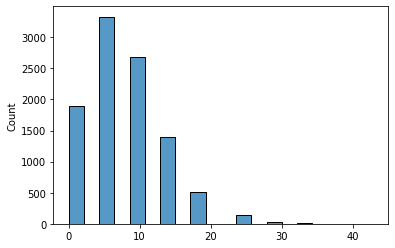

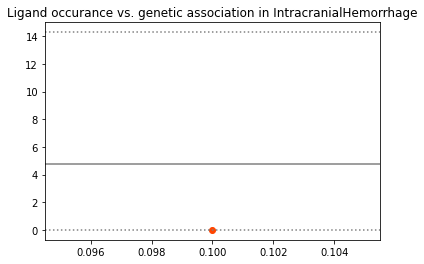

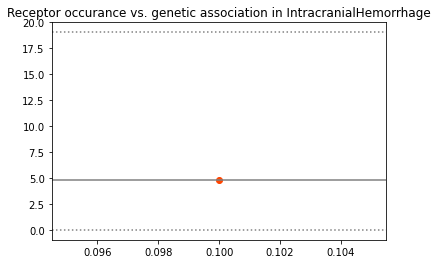

c:\Users\melis\Documents\GitHub\LR_project\mellon\lr\find_hits.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target['Empty'] = 0


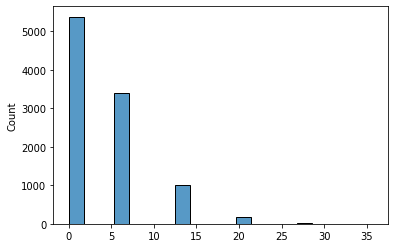

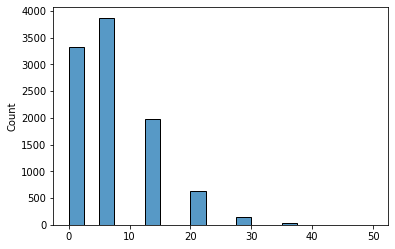

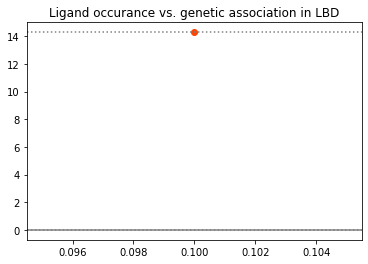

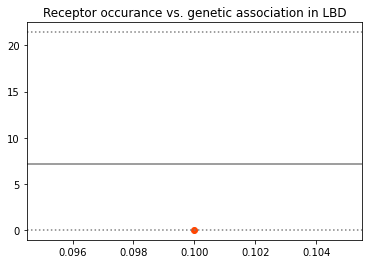

c:\Users\melis\Documents\GitHub\LR_project\mellon\lr\find_hits.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target['Empty'] = 0


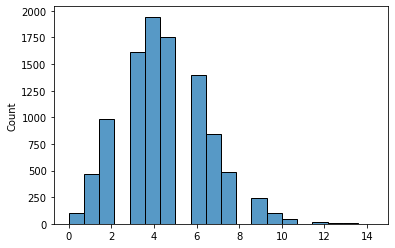

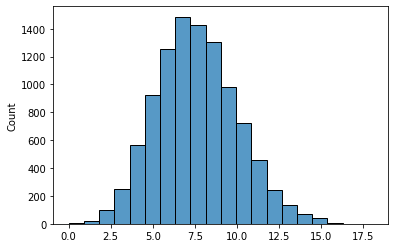

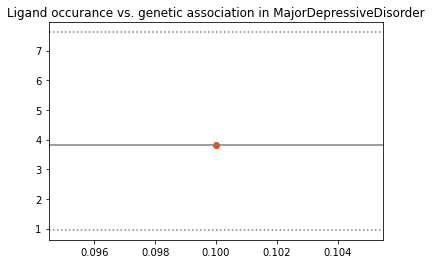

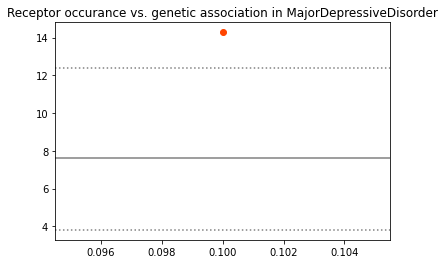

c:\Users\melis\Documents\GitHub\LR_project\mellon\lr\find_hits.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target['Empty'] = 0


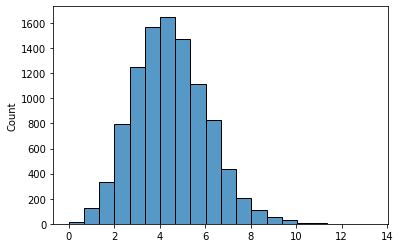

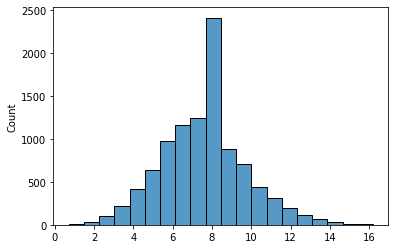

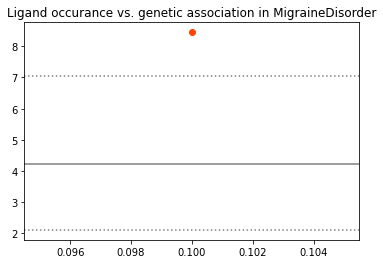

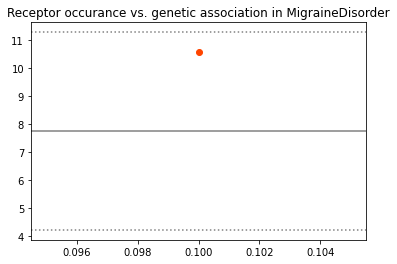

c:\Users\melis\Documents\GitHub\LR_project\mellon\lr\find_hits.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target['Empty'] = 0


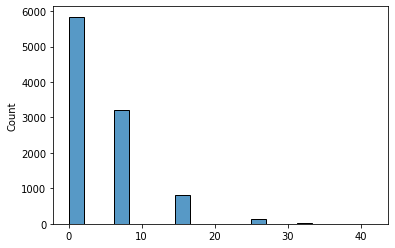

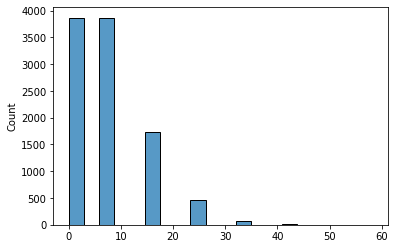

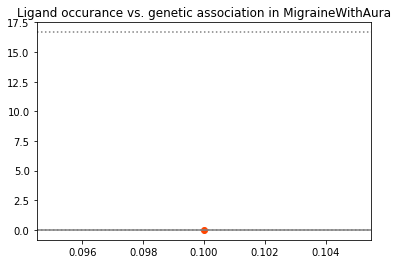

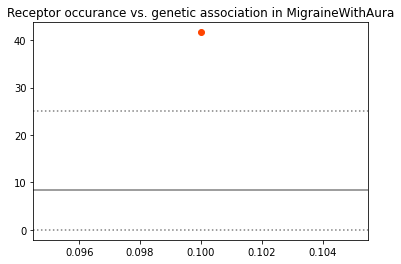

c:\Users\melis\Documents\GitHub\LR_project\mellon\lr\find_hits.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target['Empty'] = 0


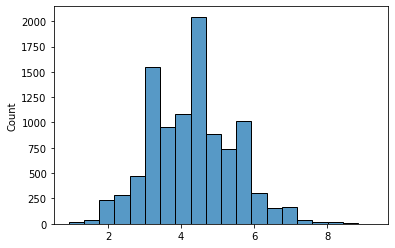

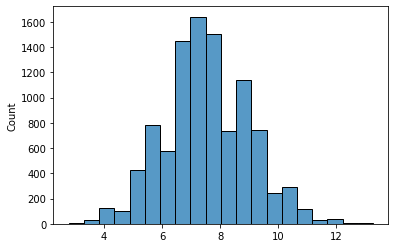

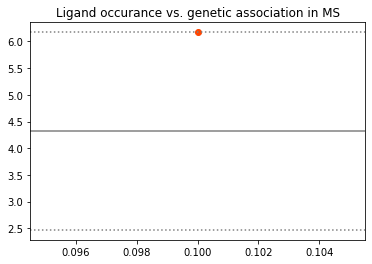

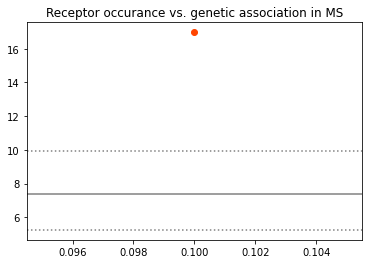

c:\Users\melis\Documents\GitHub\LR_project\mellon\lr\find_hits.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target['Empty'] = 0


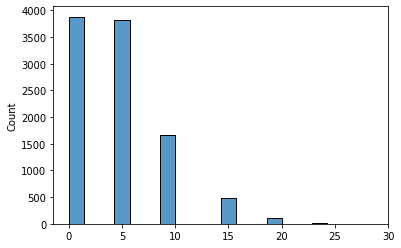

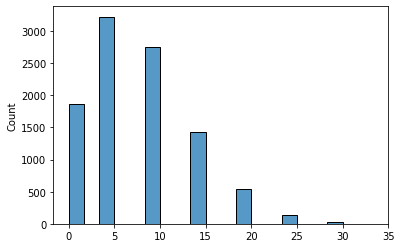

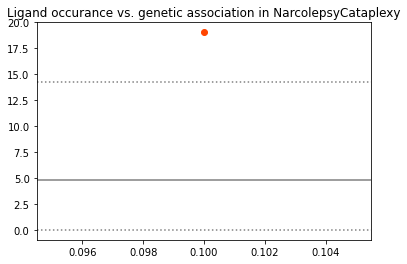

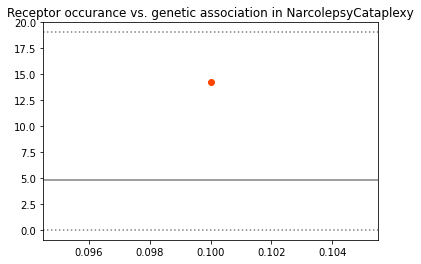

c:\Users\melis\Documents\GitHub\LR_project\mellon\lr\find_hits.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target['Empty'] = 0


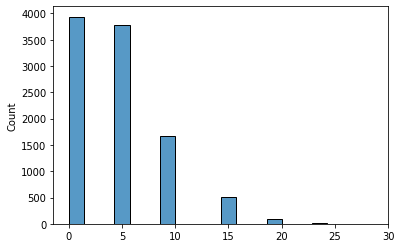

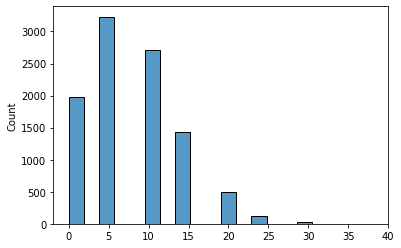

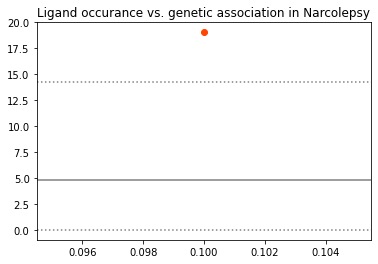

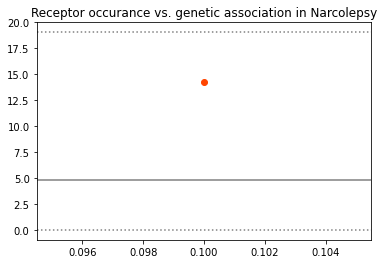

c:\Users\melis\Documents\GitHub\LR_project\mellon\lr\find_hits.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target['Empty'] = 0


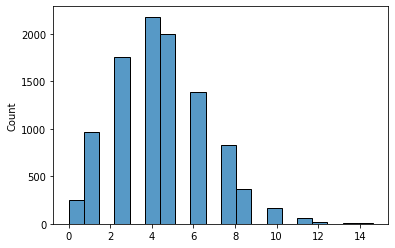

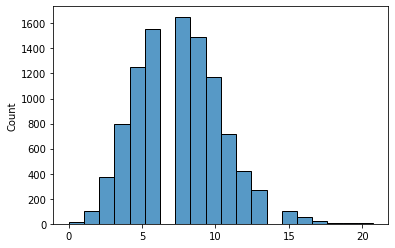

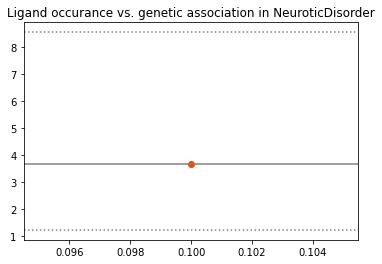

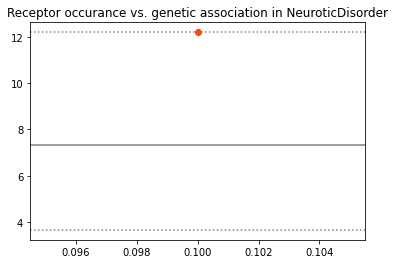

c:\Users\melis\Documents\GitHub\LR_project\mellon\lr\find_hits.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target['Empty'] = 0


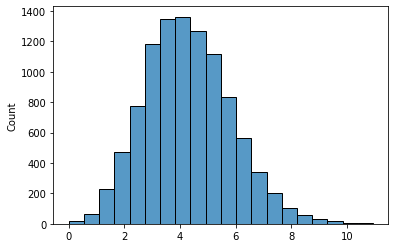

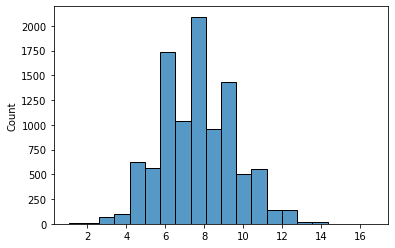

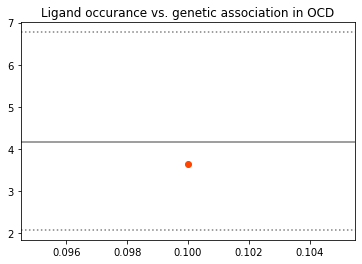

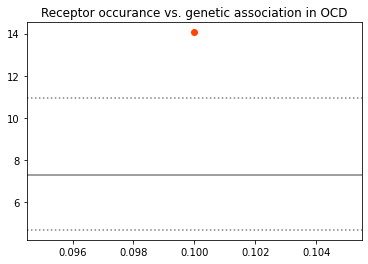

c:\Users\melis\Documents\GitHub\LR_project\mellon\lr\find_hits.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target['Empty'] = 0


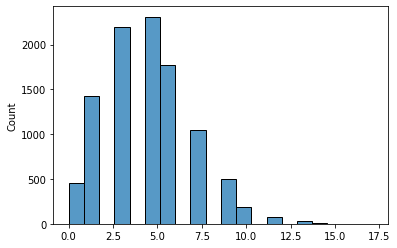

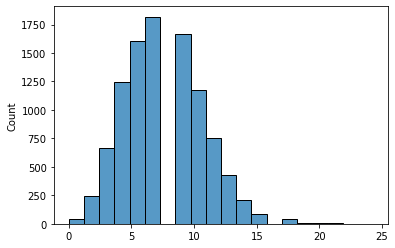

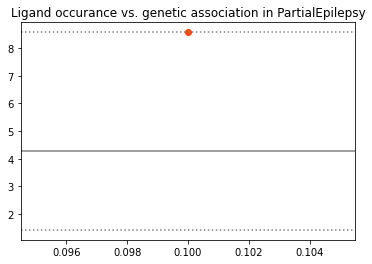

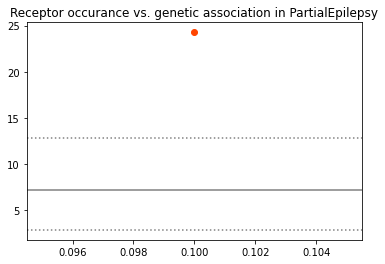

c:\Users\melis\Documents\GitHub\LR_project\mellon\lr\find_hits.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target['Empty'] = 0


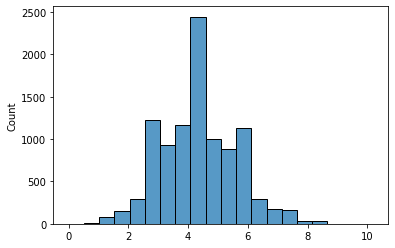

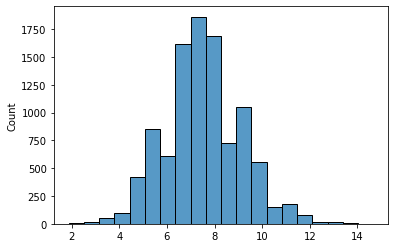

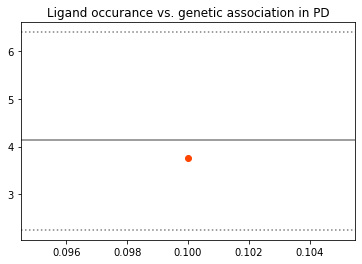

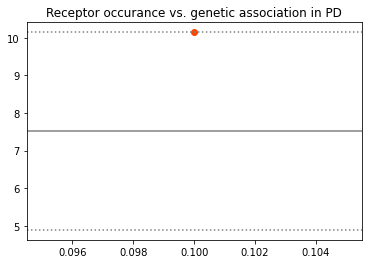

c:\Users\melis\Documents\GitHub\LR_project\mellon\lr\find_hits.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target['Empty'] = 0


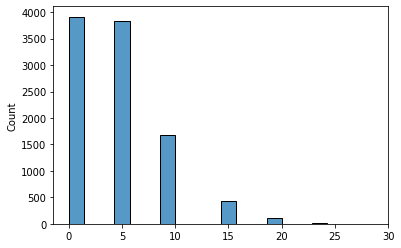

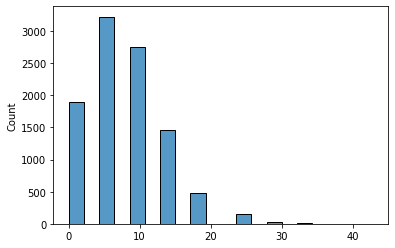

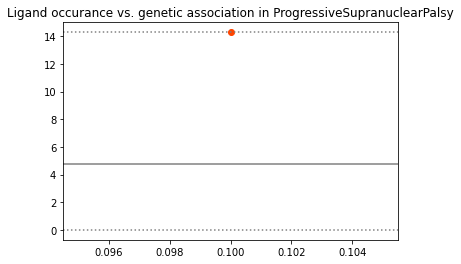

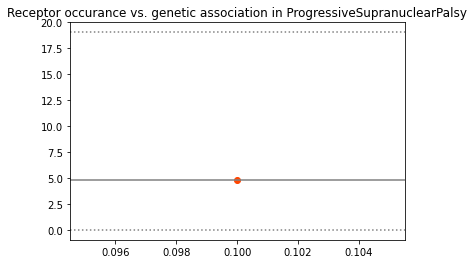

c:\Users\melis\Documents\GitHub\LR_project\mellon\lr\find_hits.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target['Empty'] = 0


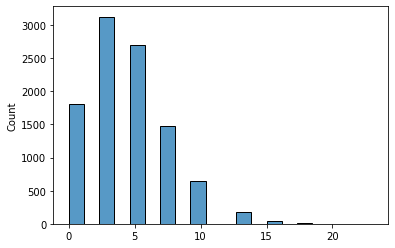

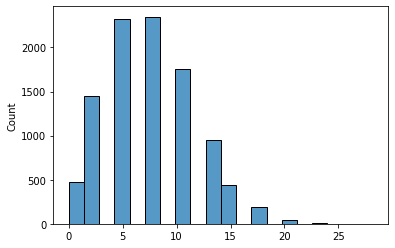

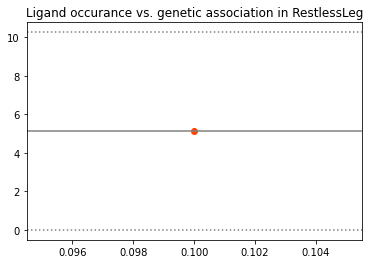

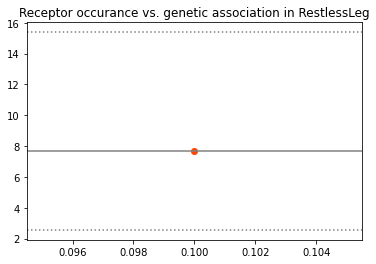

c:\Users\melis\Documents\GitHub\LR_project\mellon\lr\find_hits.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target['Empty'] = 0


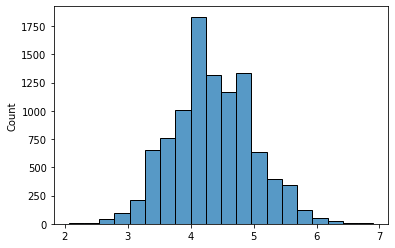

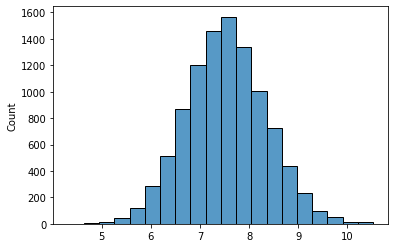

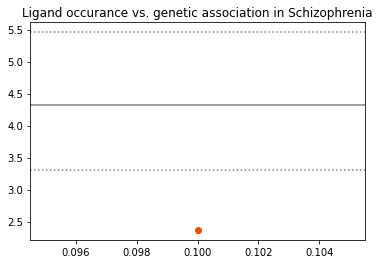

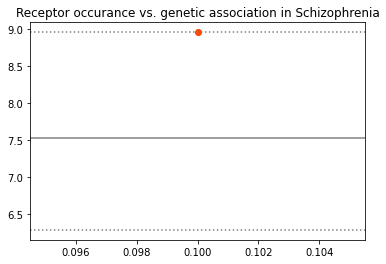

c:\Users\melis\Documents\GitHub\LR_project\mellon\lr\find_hits.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target['Empty'] = 0


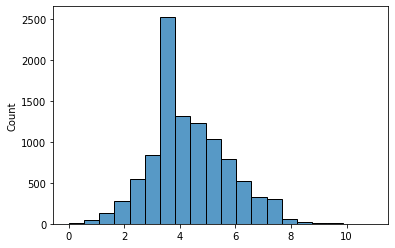

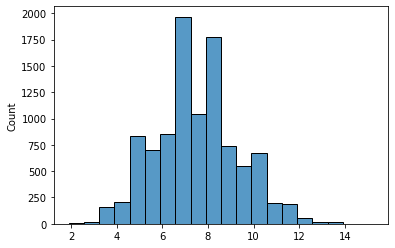

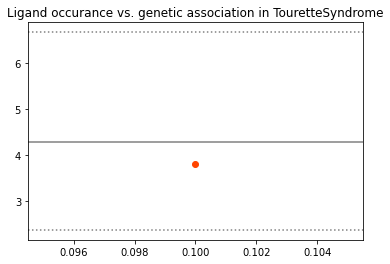

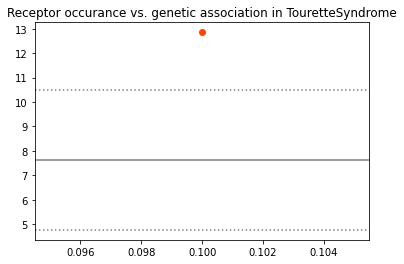

c:\Users\melis\Documents\GitHub\LR_project\mellon\lr\find_hits.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target['Empty'] = 0


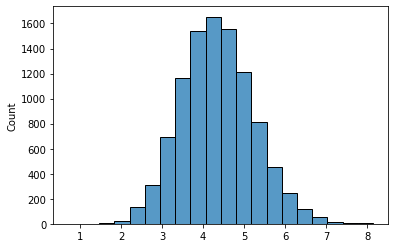

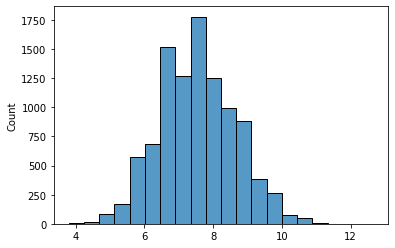

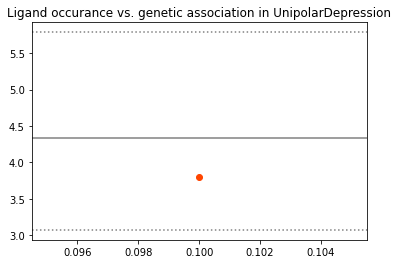

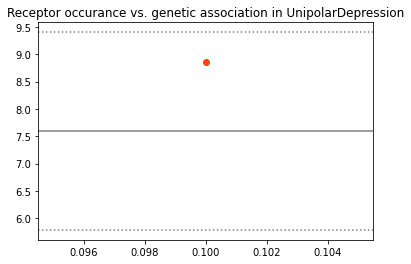

In [47]:
rng = [0.4, 0.7, 0.1]
iterations = 10000
for m in rng:
    path = glob.glob("/Users/melis/Documents/Gene-targets/Disease_gene_associations_OpenTargets/*.tsv")
    dis_list = []
    for n in range (0,len(path)):
        srcrng = []
        tgtrng = []
        disease = glob.glob("/Users/melis/Documents/Gene-targets/Disease_gene_associations_OpenTargets/*.tsv")[n].split("\\")[1].split("_")[0]
        dis = pd.read_csv(path[n], delimiter = '\t', index_col=0)
        dis = dis[(dis['objectObject']>m)]
        if np.shape(dis)[0]>10:
        #for m in rng:
            dis = pd.read_csv(path[n], delimiter = '\t', index_col=0)
            dis = dis[(dis['objectObject']>m)]
            if np.shape(dis)[0]>10:
                df = dis[(dis['objectObject']>m)]
                df['gene']=df.index
                df.reset_index(inplace = True)
                df = df.drop(columns=['symbol']).set_index(['gene'])
                df = df[df.index.isin(list(ensembl_ann[ensembl_ann['type']=='protein_coding']['gene_name']))]
                # we next calculate the occurance of Ls and Rs in our data
                all_source, pctsrc, all_targets, pcttgt, summary_LR = ml.lr.find_hits(df,db)
                # src and tgt are the percentage of L and R occurance in bootstrapped data
                src, tgt = ml.lr.bootstrap_genes(np.shape(df)[0], iterations, pd.DataFrame(protein).rename(columns={'gene_name' : 'gene'}).set_index('gene'), db)
                #We calculate the pval using the percentages 
                pval_src = np.sum(pd.DataFrame(src)>pctsrc)/len(src)
                pval_tgt = np.sum(pd.DataFrame(tgt)>pcttgt)/len(tgt)
                quant_5, quant_95 = np.quantile(src, 0.05), np.quantile(src, 0.95)

                srcrng.append(pctsrc)
                srcL = src
                quant_5L = quant_5
                quant_95L = quant_95

                quant_5, quant_95 = np.quantile(tgt, 0.05), np.quantile(tgt, 0.95)

                tgtrng.append(pcttgt)
                srcR = tgt
                quant_5R = quant_5
                quant_95R = quant_95

            plt.plot(m, srcrng, linestyle='-', marker='o', color ='orangered')
            plt.axhline(np.median(srcL), color = 'grey')
            plt.axhline(quant_5L, color = 'grey', linestyle='dotted')
            plt.axhline(quant_95L, color = 'grey', linestyle='dotted')
            plt.title("Ligand occurance vs. genetic association in %s" % disease)
            plt.show()

            plt.plot(m, tgtrng, linestyle='-', marker='o', color ='orangered')
            plt.axhline(np.median(srcR), color = 'grey')
            plt.axhline(quant_5R, color = 'grey', linestyle='dotted')
            plt.axhline(quant_95R, color = 'grey', linestyle='dotted')
            plt.title("Receptor occurance vs. genetic association in %s" % disease)
            plt.show()
            dis_list.append(disease)

            if (n==0):
                all_pctsrc = np.asarray(srcrng).reshape(1,-1)
                all_pcttgt = np.asarray(tgtrng).reshape(1,-1)
                all_pvalsrc = pval_src
                all_pvaltgt = pval_tgt
                
            else:    
                all_pctsrc = np.concatenate((all_pctsrc, np.asarray(srcrng).reshape(1,-1)), axis = 0)
                all_pcttgt = np.concatenate((all_pcttgt, np.asarray(tgtrng).reshape(1,-1)), axis = 0)
                all_pvalsrc = np.concatenate((all_pvalsrc, pval_src), axis = 0)
                all_pvaltgt = np.concatenate((all_pvaltgt, pval_tgt), axis = 0)
    tgt_df = pd.DataFrame(np.concatenate((np.asarray(dis_list).reshape(1,-1), all_pcttgt.reshape(1,-1), all_pvaltgt.reshape(1,-1)), axis = 0).T, columns = ['Disease', '% LR', 'pval'])
    tgt_df['LR'] = 'target'
    src_df = pd.DataFrame(np.concatenate((np.asarray(dis_list).reshape(1,-1), all_pctsrc.reshape(1,-1), all_pvalsrc.reshape(1,-1)), axis = 0).T, columns = ['Disease', '% LR', 'pval'])
    src_df['LR'] = 'source'
    pd.concat([tgt_df, src_df], axis = 0).to_csv('processed_data/01-clustering_genes_and_diseases/01a_LR_occurrance_across_diseases/LR_occurance_%s.csv' % str(m), index = False)

In [ ]:
rng = [0.1]

path = glob.glob("/Users/melis/Documents/Gene-targets/Disease_gene_associations_OpenTargets/*.tsv")
dis_list = []
for n in range (0,len(path)):
    srcrng = []
    tgtrng = []
    disease = glob.glob("/Users/melis/Documents/Gene-targets/Disease_gene_associations_OpenTargets/*.tsv")[n].split("\\")[1].split("_")[0]
    dis = pd.read_csv(path[n], delimiter = '\t', index_col=0)
    dis = dis[(dis['objectObject']>m)]
    if np.shape(dis)[0]>10:
        for m in rng:
            dis = pd.read_csv(path[n], delimiter = '\t', index_col=0)
            dis = dis[(dis['objectObject']>m)]
            if np.shape(dis)[0]>10:
                df = dis[(dis['objectObject']>m)]
                df['gene']=df.index
                df.reset_index(inplace = True)
                df = df.drop(columns=['symbol']).set_index(['gene'])
                # we next calculate the occurance of Ls and Rs in our data
                all_source, pctsrc, all_targets, pcttgt, summary_LR = ml.lr.find_hits(df,db)
                # src and tgt are the percentage of L and R occurance in bootstrapped data
                src, tgt = ml.lr.bootstrap_genes(np.shape(df)[0], 10000, pd.DataFrame(symbols_gtex).rename(columns={'symbol' : 'gene'}).set_index('gene'), db)
                #We calculate the pval using the percentages 
                pval_src = np.sum(pd.DataFrame(src)>pctsrc)/len(src)
                pval_tgt = np.sum(pd.DataFrame(tgt)>pcttgt)/len(tgt)
                quant_5, quant_95 = np.quantile(src, 0.05), np.quantile(src, 0.95)

                srcrng.append(pctsrc)
                srcL = src
                quant_5L = quant_5
                quant_95L = quant_95

                quant_5, quant_95 = np.quantile(tgt, 0.05), np.quantile(tgt, 0.95)

                tgtrng.append(pcttgt)
                srcR = tgt
                quant_5R = quant_5
                quant_95R = quant_95

        plt.plot(rng, srcrng, linestyle='-', marker='o', color ='orangered')
        plt.axhline(np.median(srcL), color = 'grey')
        plt.axhline(quant_5L, color = 'grey', linestyle='dotted')
        plt.axhline(quant_95L, color = 'grey', linestyle='dotted')
        plt.title("Ligand occurance vs. genetic association in %s" % disease)
        plt.show()

        plt.plot(rng, tgtrng, linestyle='-', marker='o', color ='orangered')
        plt.axhline(np.median(srcR), color = 'grey')
        plt.axhline(quant_5R, color = 'grey', linestyle='dotted')
        plt.axhline(quant_95R, color = 'grey', linestyle='dotted')
        plt.title("Receptor occurance vs. genetic association in %s" % disease)
        plt.show()
        dis_list.append(disease)

        if (n==0):
            all_pctsrc = np.asarray(srcrng).reshape(1,-1)
            all_pcttgt = np.asarray(tgtrng).reshape(1,-1)
            all_pvalsrc = pval_src
            all_pvaltgt = pval_tgt
            
        else:    
            all_pctsrc = np.concatenate((all_pctsrc, np.asarray(srcrng).reshape(1,-1)), axis = 0)
            all_pcttgt = np.concatenate((all_pcttgt, np.asarray(tgtrng).reshape(1,-1)), axis = 0)
            all_pvalsrc = np.concatenate((all_pvalsrc, pval_src), axis = 0)
            all_pvaltgt = np.concatenate((all_pvaltgt, pval_tgt), axis = 0)
tgt_df = pd.DataFrame(np.concatenate((np.asarray(dis_list).reshape(1,-1), all_pcttgt.reshape(1,-1), all_pvaltgt.reshape(1,-1)), axis = 0).T, columns = ['Disease', '% LR', 'pval'])
tgt_df['LR'] = 'target'
src_df = pd.DataFrame(np.concatenate((np.asarray(dis_list).reshape(1,-1), all_pctsrc.reshape(1,-1), all_pvalsrc.reshape(1,-1)), axis = 0).T, columns = ['Disease', '% LR', 'pval'])
src_df['LR'] = 'source'
pd.concat([tgt_df, src_df], axis = 0).to_csv('processed_data/LR_occurance.csv', index = False)